# SNLP 2021 Final Project

Name 1:  Nobel Jacob Varghese
<br/>Student id 1:  7002401
<br/>Email 1: noja00001@uni-saarland.de


Name 2:  Nitish Juttu
<br/>Student id 2:  7002402
<br/>Email 2: niju00001@uni-saarland.de

**Instructions:** Your final submission should contain _a separate Notebook_ (not including our instructions). You may also implement your code in different Python files and show the output in the Notebooks. In this case, make sure you submit your Python files as well. Do not submit the data files and any other debug output. Your submission should have a clear structure and should be easy to follow. Other instructions to follow have been given in detail with the project problem statement. Read them carefully.

Upload the zipped folder in Teams. Only one member from the group should make the submission. The deadline for the project submission is August 20th, 2021 (23:59 pm). 

## **1 Data Preparation**

In [1]:
import re
import nltk
import string 
import os
import math

file_bengali = open("data/bengali_corpus.txt", "r" , encoding="utf8")
bengali_read_data=file_bengali.read()
string_without_punctuations_bengali= re.split("[;,|?!]", bengali_read_data)
string_without_punctuations_bengali= ".".join(string_without_punctuations_bengali)
string_without_punctuations_bengali = re.sub(r'\.+', ".", string_without_punctuations_bengali)

 
bengali_total_length=len(string_without_punctuations_bengali)
bengali_train_size=math.floor(0.8*bengali_total_length)
bengali_test_size=math.ceil(0.2*bengali_total_length)

 

file_bengali = open('train_file_bengali.txt', 'w' , encoding="utf8")
file2_bengali = open('test_file_bengali.txt', 'w' , encoding="utf8")
file_bengali.write(string_without_punctuations_bengali[0:bengali_train_size])
file2_bengali.write(string_without_punctuations_bengali[bengali_train_size:bengali_total_length])

298520

## **2 Subword Segmentation**


In [2]:
#2.2


!spm_train \
  --input=train_file_bengali.txt \
  --model_prefix=model_prefix_bengali \
  --vocab_size=1000 \
  --character_coverage=1.0 \
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_bengali.txt
  input_format: 
  model_prefix: model_prefix_bengali
  model_type: BPE
  vocab_size: 1000
  self_test_sample_size: 0
  character_coverage: 1
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whitespaces:

In [3]:
!spm_encode \
  --model=model_prefix_bengali.model \
  --output_format=piece \
  < train_file_bengali.txt \
  > segmented_bengali.txt

In [4]:
!spm_decode \
  --model=model_prefix_bengali.model \
  --input_format=piece \
  < segmented_bengali.txt \
  > original_bengali.txt


In [5]:
!pwd
!ls 

/home/snlp-project-21/SNLP_2021_Final_Project_r1
bengali.ipynb		    model_prefix_bengali.vocab	segmented_bengali.txt
data			    original_bengali.txt	test_file_bengali.txt
model_prefix_bengali.model  project_bengali		train_file_bengali.txt


In [2]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 
!mkdir project_bengali
!cp train_file_bengali.txt project_bengali
!cp test_file_bengali.txt project_bengali
%cd project_bengali

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1
mkdir: cannot create directory ‘project_bengali’: File exists
/home/snlp-project-21/SNLP_2021_Final_Project_r1/project_bengali


## **2.3 Subword Segmentation**

In [7]:


!spm_train \
  --input=train_file_bengali.txt \
  --model_prefix=model_bengali_characters \
  --vocab_size=85\
  --character_coverage=0.995 \
  --model_type=bpe




!spm_train \
  --input=train_file_bengali.txt \
  --model_prefix=model_bengali_subwords_sm \
  --vocab_size=800 \
  --character_coverage=0.995 \
  --model_type=bpe



!spm_train \
  --input=train_file_bengali.txt \
  --model_prefix=model_bengali_subwords_lg \
  --vocab_size=1600 \
  --character_coverage=0.995\
  --model_type=bpe

sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_bengali.txt
  input_format: 
  model_prefix: model_bengali_characters
  model_type: BPE
  vocab_size: 85
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
}
normalizer_spec {
  name: nmt_nfkc
  add_dummy_prefix: 1
  remove_extra_whites

trainer_interface.cc(615) LOG(INFO) Saving model: model_bengali_subwords_sm.model
trainer_interface.cc(626) LOG(INFO) Saving vocabs: model_bengali_subwords_sm.vocab
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: train_file_bengali.txt
  input_format: 
  model_prefix: model_bengali_subwords_lg
  model_type: BPE
  vocab_size: 1600
  self_test_sample_size: 0
  character_coverage: 0.995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  un

In [8]:
#encoding using the train file for 1.charachter 2.subword units small 3.sub word units large

!spm_encode \
  --model=model_bengali_characters.model \
  --output_format=piece \
  < train_file_bengali.txt \
  > segmented_bengali_charachter_train.txt


!spm_encode \
  --model=model_bengali_subwords_sm.model \
  --output_format=piece \
  < train_file_bengali.txt \
  > segmented_bengali_subword_sm_train.txt


!spm_encode \
  --model=model_bengali_subwords_lg.model \
  --output_format=piece \
  < train_file_bengali.txt \
  > segmented_bengali_subword_lg_train.txt


In [9]:
#encoding using the test file for 1.charachter 2.subword units small 3.sub word units large

!spm_encode \
  --model=model_bengali_characters.model \
  --output_format=piece \
  < test_file_bengali.txt \
  > segmented_bengali_charachter_test.txt

!spm_encode \
  --model=model_bengali_subwords_sm.model \
  --output_format=piece \
  < test_file_bengali.txt \
  > segmented_bengali_subword_sm_test.txt

!spm_encode \
  --model=model_bengali_subwords_lg.model \
  --output_format=piece \
  < test_file_bengali.txt \
  > segmented_bengali_subword_lg_test.txt

## **3 LM Training**

In [10]:
#base models 

!mkdir -p models_bengali/bengali_char/rnnlm \
 && cd models_bengali/bengali_char/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_bengali_charachter_train.txt \
 -valid ../../../segmented_bengali_charachter_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_bengali_charachter_train.txt
valid file: ../../../segmented_bengali_charachter_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_bengali_charachter_train.txt
Vocab size: 900
Words in train file: 901725
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 4.1557    Words/sec: 989.3   VALID entropy: 4.1396
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 3.9419    Words/sec: 1055.7   VALID entropy: 4.0737
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 3.9038    Words/sec: 1051.7   VALID entropy: 4.0461
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 3.8852    Words/sec: 1045.0   VALID entropy: 4.0253
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 3.8747    Words/sec: 1030.0   VALID entropy: 4.0074
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 3.8668    Words/sec: 952.6   VALID entropy: 4.0043
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 3.8115    Words/sec: 1065.1   VALID entropy: 3.908

In [11]:
!mkdir -p models_bengali/bengali_subwords_sm/rnnlm \
 && cd models_bengali/bengali_subwords_sm/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_bengali_subword_sm_train.txt \
 -valid ../../../segmented_bengali_subword_sm_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_bengali_subword_sm_train.txt
valid file: ../../../segmented_bengali_subword_sm_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_bengali_subword_sm_train.txt
Vocab size: 1593
Words in train file: 572262
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 6.3266    Words/sec: 1059.3   VALID entropy: 5.8574
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 5.7729    Words/sec: 1086.4   VALID entropy: 5.7418
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 5.6693    Words/sec: 1145.4   VALID entropy: 5.7039
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.6177    Words/sec: 1135.2   VALID entropy: 5.6782
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.5857    Words/sec: 1174.0   VALID entropy: 5.6596
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.5632    Words/sec: 1193.0   VALID entropy: 5.6447
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 5.4862    Words/sec: 1114.0   VALID entropy: 5.

In [12]:
!mkdir -p models_bengali/bengali_subwords_lg/rnnlm \
 && cd models_bengali/bengali_subwords_lg/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_bengali_subword_lg_train.txt \
 -valid ../../../segmented_bengali_subword_lg_test.txt \
 -rnnlm model \
   -hidden 40 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 3 \
   -class 9999

debug mode: 2
train file: ../../../segmented_bengali_subword_lg_train.txt
valid file: ../../../segmented_bengali_subword_lg_test.txt
class size: 9999
Hidden layer size: 40
BPTT: 3
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_bengali_subword_lg_train.txt
Vocab size: 2297
Words in train file: 506491
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.1842    Words/sec: 1164.7   VALID entropy: 6.5246
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.3666    Words/sec: 1103.4   VALID entropy: 6.3048
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.2012    Words/sec: 1205.0   VALID entropy: 6.2177
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 6.1213    Words/sec: 1177.2   VALID entropy: 6.1716
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 6.0716    Words/sec: 1197.4   VALID entropy: 6.1464
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 6.0364    Words/sec: 1172.0   VALID entropy: 6.1292
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 5.9425    Words/sec: 1209.1   VALID entropy: 6.

## **3 LM Training - Tuned**

In [14]:
!mkdir -p tuned_models_bengali/bengali_char/rnnlm \
 && cd tuned_models_bengali/bengali_char/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_bengali_charachter_train.txt \
 -valid ../../../segmented_bengali_charachter_test.txt \
 -rnnlm model \
   -hidden 100 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 4 \
   -class 999



debug mode: 2
train file: ../../../segmented_bengali_charachter_train.txt
valid file: ../../../segmented_bengali_charachter_test.txt
class size: 999
Hidden layer size: 100
BPTT: 4
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_bengali_charachter_train.txt
Vocab size: 900
Words in train file: 901725
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 3.9594    Words/sec: 4054.4   VALID entropy: 3.8437
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 3.6152    Words/sec: 4055.9   VALID entropy: 3.7073
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 3.5401    Words/sec: 4289.1   VALID entropy: 3.6563
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 3.5059    Words/sec: 3830.1   VALID entropy: 3.6285
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 3.4860    Words/sec: 4042.6   VALID entropy: 3.6152
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 3.4719    Words/sec: 3906.5   VALID entropy: 3.6089
Iter:   6	Alpha: 0.050000	   TRAIN entropy: 3.4058    Words/sec: 3913.7   VALID entropy: 3.5

In [15]:
!mkdir -p tuned_models_bengali/bengali_subwords_sm/rnnlm \
 && cd tuned_models_bengali/bengali_subwords_sm/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_bengali_subword_sm_train.txt \
 -valid ../../../segmented_bengali_subword_sm_test.txt \
 -rnnlm model \
   -hidden  120\
   -rand-seed 1 \
   -debug 2 \
   -bptt 5 \
   -class 1600

debug mode: 2
train file: ../../../segmented_bengali_subword_sm_train.txt
valid file: ../../../segmented_bengali_subword_sm_test.txt
class size: 1600
Hidden layer size: 120
BPTT: 5
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_bengali_subword_sm_train.txt
Vocab size: 1593
Words in train file: 572262
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 6.2116    Words/sec: 2138.8   VALID entropy: 5.6258
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 5.5388    Words/sec: 2239.1   VALID entropy: 5.4577
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 5.3717    Words/sec: 2359.5   VALID entropy: 5.3762
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.2770    Words/sec: 2224.3   VALID entropy: 5.3328
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.2107    Words/sec: 2329.4   VALID entropy: 5.2977
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.1608    Words/sec: 2346.9   VALID entropy: 5.2806
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 5.1227    Words/sec: 2353.0   VALID entropy: 5

In [16]:
!mkdir -p tuned_models_bengali/bengali_subwords_lg/rnnlm \
 && cd tuned_models_bengali/bengali_subwords_lg/rnnlm \
 && /home/snlp-project-21/rnnlm/rnnlm \
 -train ../../../segmented_bengali_subword_lg_train.txt \
 -valid ../../../segmented_bengali_subword_lg_test.txt \
 -rnnlm model \
   -hidden 80 \
   -rand-seed 1 \
   -debug 2 \
   -bptt 4 \
   -class 2000

debug mode: 2
train file: ../../../segmented_bengali_subword_lg_train.txt
valid file: ../../../segmented_bengali_subword_lg_test.txt
class size: 2000
Hidden layer size: 80
BPTT: 4
Rand seed: 1
rnnlm file: model
Starting training using file ../../../segmented_bengali_subword_lg_train.txt
Vocab size: 2297
Words in train file: 506491
Iter:   0	Alpha: 0.100000	   TRAIN entropy: 7.1406    Words/sec: 2705.6   VALID entropy: 6.4303
Iter:   1	Alpha: 0.100000	   TRAIN entropy: 6.2584    Words/sec: 2662.2   VALID entropy: 6.1817
Iter:   2	Alpha: 0.100000	   TRAIN entropy: 6.0379    Words/sec: 2658.7   VALID entropy: 6.0847
Iter:   3	Alpha: 0.100000	   TRAIN entropy: 5.9228    Words/sec: 2606.8   VALID entropy: 6.0297
Iter:   4	Alpha: 0.100000	   TRAIN entropy: 5.8484    Words/sec: 2760.5   VALID entropy: 5.9939
Iter:   5	Alpha: 0.100000	   TRAIN entropy: 5.7950    Words/sec: 2773.2   VALID entropy: 5.9622
Iter:   6	Alpha: 0.100000	   TRAIN entropy: 5.7539    Words/sec: 2749.8   VALID entropy: 5.

## **4 Text Generation (16 points)**

**Note: The coresponding generated file is saved under models_bengali/{corresponding_model}/rnnlm/model **


**Note: The coresponding decoded file is saved under models_bengali/{corresponding_model}/rnnlm/model **


In [17]:
#text gernaration for normal models

for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models_bengali/bengali_char/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models_bengali/bengali_char/rnnlm/$[10**$i].txt
    !spm_decode --model=model_bengali_characters.model --input_format=piece < models_bengali/bengali_char/rnnlm/$[10**$i].txt > models_bengali/bengali_char/rnnlm/decoded$[10**$i].txt



generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [3]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models_bengali/bengali_subwords_sm/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models_bengali/bengali_subwords_sm/rnnlm/$[10**$i].txt
    !spm_decode --model=model_bengali_subwords_sm.model --input_format=piece < models_bengali/bengali_subwords_sm/rnnlm/$[10**$i].txt > models_bengali/bengali_subwords_sm/rnnlm/decoded$[10**$i].txt


generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [4]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm models_bengali/bengali_subwords_lg/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > models_bengali/bengali_subwords_lg/rnnlm/$[10**$i].txt
    !spm_decode --model=model_bengali_subwords_lg.model --input_format=piece < models_bengali/bengali_subwords_lg/rnnlm/$[10**$i].txt > models_bengali/bengali_subwords_lg/rnnlm/decoded$[10**$i].txt


generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


## **Text Generation - Tuned**

**Note: The coresponding generated file is saved under tuned_models_bengali/{corresponding_model}/rnnlm/model **


**Note: The coresponding decoded file is saved under tuned_models_bengali/{corresponding_model}/rnnlm/model **


In [6]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models_bengali/bengali_char/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models_bengali/bengali_char/rnnlm/$[10**$i].txt
    !spm_decode --model=model_bengali_characters.model --input_format=piece < tuned_models_bengali/bengali_char/rnnlm/$[10**$i].txt > tuned_models_bengali/bengali_char/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [7]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models_bengali/bengali_subwords_sm/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models_bengali/bengali_subwords_sm/rnnlm/$[10**$i].txt
    !spm_decode --model=model_bengali_subwords_sm.model --input_format=piece < tuned_models_bengali/bengali_subwords_sm/rnnlm/$[10**$i].txt > tuned_models_bengali/bengali_subwords_sm/rnnlm/decoded$[10**$i].txt

generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


In [8]:
for i in range(1,8):
    !echo 'generating' $((10**$i))
    !/home/snlp-project-21/rnnlm/rnnlm \
    -rnnlm tuned_models_bengali/bengali_subwords_lg/rnnlm/model -gen  $[10**$i]  -debug 0 \
    > tuned_models_bengali/bengali_subwords_lg/rnnlm/$[10**$i].txt
    !spm_decode --model=model_bengali_subwords_lg.model --input_format=piece < tuned_models_bengali/bengali_subwords_lg/rnnlm/$[10**$i].txt > tuned_models_bengali/bengali_subwords_lg/rnnlm/decoded$[10**$i].txt


generating 10
generating 100
generating 1000
generating 10000
generating 100000
generating 1000000
generating 10000000


## **5 OOV comparison**


In [9]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1/project_bengali


In [10]:
#5.1

with open('train_file_bengali.txt') as f:
    flat_list_train_bengali=[word for line in f for word in line.split()]
    
set_train_bengali=set(flat_list_train_bengali)



with open('test_file_bengali.txt') as f:
    flat_list_test_bengali=[word for line in f for word in line.split()]

set_test_bengali=set(flat_list_test_bengali)

ovv_baseline_model=len(set_test_bengali-set_train_bengali)/len(flat_list_test_bengali)

print(ovv_baseline_model)



0.15207391160885853


In [11]:
!mkdir -p decoded_text/bengali_char
!mkdir -p decoded_text/bengali_subwords_sm
!mkdir -p decoded_text/bengali_subwords_lg

In [12]:
!mkdir -p tuned_decoded_text/bengali_char
!mkdir -p tuned_decoded_text/bengali_subwords_sm
!mkdir -p tuned_decoded_text/bengali_subwords_lg

In [13]:
import os
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd)) 

Current working directory: /home/snlp-project-21/SNLP_2021_Final_Project_r1/project_bengali


In [14]:
#for each decoded file combine with original train
for i in range(1,8):
    filenames = ['train_file_bengali.txt', 'models_bengali/bengali_char/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/bengali_char/bengali_char_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

                    
                    
for i in range(1,8):
    filenames = ['train_file_bengali.txt', 'models_bengali/bengali_subwords_sm/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/bengali_subwords_sm/bengali_subwords_sm_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
                    
                    
for i in range(1,8):
    filenames = ['train_file_bengali.txt', 'models_bengali/bengali_subwords_lg/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('decoded_text/bengali_subwords_lg/bengali_subwords_lg_concatenated{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

In [15]:
#for each decoded file combine with original train
for i in range(1,8):
    filenames = ['train_file_bengali.txt', 'tuned_models_bengali/bengali_char/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/bengali_char/bengali_char_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

                    
                    
for i in range(1,8):
    filenames = ['train_file_bengali.txt', 'tuned_models_bengali/bengali_subwords_sm/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/bengali_subwords_sm/bengali_subwords_sm_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)
                    
                    
                    
for i in range(1,8):
    filenames = ['train_file_bengali.txt', 'tuned_models_bengali/bengali_subwords_lg/rnnlm/decoded{}.txt'.format(pow(10, i))]
    with open('tuned_decoded_text/bengali_subwords_lg/bengali_subwords_lg_concatenated_tuned{}'.format(i), 'w') as outfile:
        for fname in filenames:
            with open(fname) as infile:
                for line in infile:
                    outfile.write(line)

In [16]:
bengali_char={}

for i in range(1,8):
    with open('decoded_text/bengali_char/bengali_char_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_bengali.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    bengali_char['{}'.format(pow(10, i))]=ovv_value
    

print(bengali_char)


bengali_subwords_sm={}

for i in range(1,8):
    with open('decoded_text/bengali_subwords_sm/bengali_subwords_sm_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_bengali.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    bengali_subwords_sm['{}'.format(pow(10, i))]=ovv_value
    

print(bengali_subwords_sm)

bengali_subwords_lg={}

for i in range(1,8):
    with open('decoded_text/bengali_subwords_lg/bengali_subwords_lg_concatenated{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_bengali.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    bengali_subwords_lg['{}'.format(pow(10, i))]=ovv_value
    

print(bengali_subwords_lg)

{'10': 0.15207391160885853, '100': 0.15207391160885853, '1000': 0.1520545020477087, '10000': 0.1518604064362105, '100000': 0.1501523650550261, '1000000': 0.14419362978203062, '10000000': 0.13182973932959377}
{'10': 0.15207391160885853, '100': 0.15207391160885853, '1000': 0.1520545020477087, '10000': 0.15176335863046136, '100000': 0.14958948778168127, '1000000': 0.1410492808757594, '10000000': 0.12462879214300965}
{'10': 0.15207391160885853, '100': 0.15207391160885853, '1000': 0.1520545020477087, '10000': 0.15174394906931155, '100000': 0.14991945032122825, '1000000': 0.1406222705304633, '10000000': 0.12253255953882883}


In [17]:
bengali_char_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/bengali_char/bengali_char_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
        
    
    with open('test_file_bengali.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    bengali_char_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(bengali_char_tuned)


bengali_subwords_sm_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/bengali_subwords_sm/bengali_subwords_sm_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_bengali.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    bengali_subwords_sm_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(bengali_subwords_sm_tuned)

bengali_subwords_lg_tuned={}

for i in range(1,8):
    with open('tuned_decoded_text/bengali_subwords_lg/bengali_subwords_lg_concatenated_tuned{}'.format(i)) as f:
        temp1=[word for line in f for word in line.split()]
        set_temp1=set(temp1)
    
    with open('test_file_bengali.txt') as f:
        temp2=[word for line in f for word in line.split()]
        set_temp2=set(temp2)
    ovv_value=len(set_temp2-set_temp1)/len(temp2)

    bengali_subwords_lg_tuned['{}'.format(pow(10, i))]=ovv_value
    

print(bengali_subwords_lg_tuned)




{'10': 0.15207391160885853, '100': 0.15207391160885853, '1000': 0.15207391160885853, '10000': 0.15184099687506067, '100000': 0.15011354593272647, '1000000': 0.14256322664544555, '10000000': 0.12653092913569225}
{'10': 0.15207391160885853, '100': 0.15207391160885853, '1000': 0.1520545020477087, '10000': 0.15182158731391082, '100000': 0.14974476427087985, '1000000': 0.1404281749189651, '10000000': 0.12206673007123309}
{'10': 0.15207391160885853, '100': 0.1520545020477087, '1000': 0.1520350924865589, '10000': 0.15178276819161118, '100000': 0.14941480173133284, '1000000': 0.13971002115642164, '10000000': 0.12053337474039712}


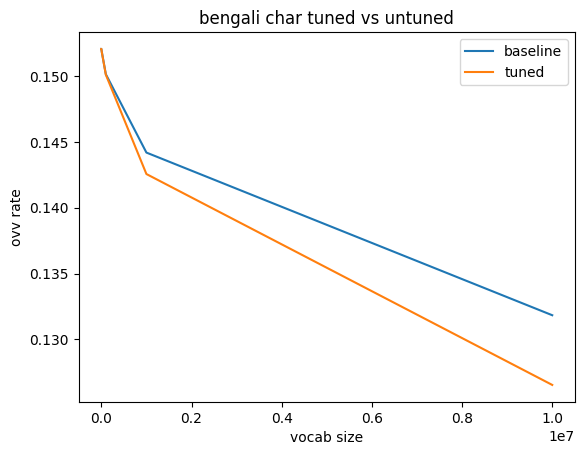

In [18]:
import matplotlib.pyplot as plt

x_axis_bengali_char=[10,100,1000,10000,100000,1000000,10000000]
y_axis_bengali_char=[]

x_axis_bengali_tuned=[10,100,1000,10000,100000,1000000,10000000]
y_axis_bengali_char_tuned=[]


for key in bengali_char:
    y_axis_bengali_char.append(bengali_char[key])
    
for key in bengali_char_tuned:
    y_axis_bengali_char_tuned.append(bengali_char_tuned[key])

plt.plot(x_axis_bengali_char, y_axis_bengali_char,label="baseline")

plt.plot(x_axis_bengali_tuned,y_axis_bengali_char_tuned,label="tuned")

plt.title('bengali char tuned vs untuned')


plt.xlabel("vocab size")
plt.ylabel("ovv rate")
plt.legend(loc="upper right")

plt.show()

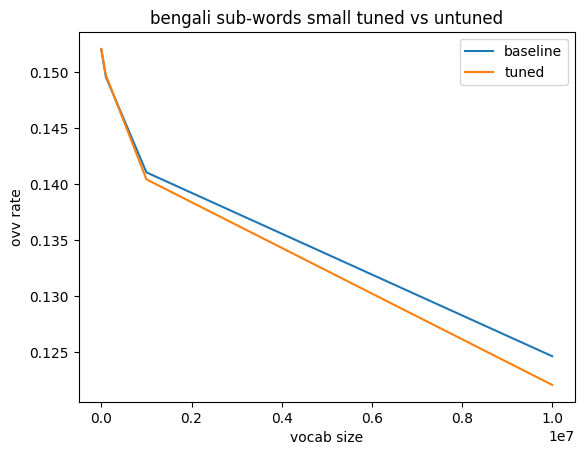

In [19]:
import matplotlib.pyplot as plt

x_axis_bengali_subwords_sm=[10,100,1000,10000,100000,1000000,10000000]
y_axis_bengali_subwords_sm=[]


x_axis_bengali_subwords_sm_tuned=[10,100,1000,10000,100000,1000000,10000000]
y_axis_bengali_subwords_sm_tuned=[]


for key in bengali_subwords_sm:
    y_axis_bengali_subwords_sm.append(bengali_subwords_sm[key])
    
for key in bengali_subwords_sm_tuned:
    y_axis_bengali_subwords_sm_tuned.append(bengali_subwords_sm_tuned[key])

plt.plot(x_axis_bengali_subwords_sm, y_axis_bengali_subwords_sm,label="baseline")

plt.plot(x_axis_bengali_subwords_sm_tuned,y_axis_bengali_subwords_sm_tuned,label="tuned")

plt.title('bengali sub-words small tuned vs untuned')


plt.xlabel("vocab size")
plt.ylabel("ovv rate")
plt.legend(loc="upper right")

plt.show()

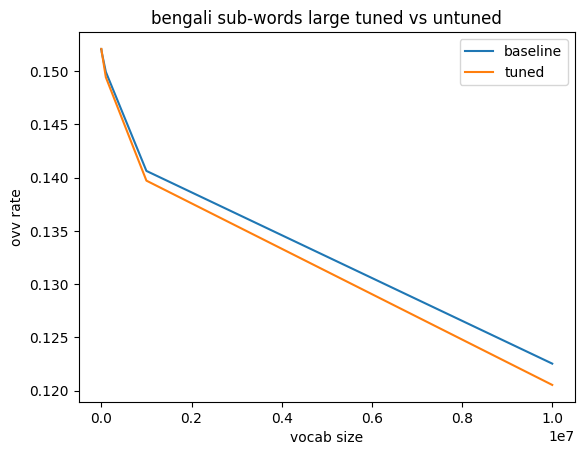

In [20]:
import matplotlib.pyplot as plt

x_axis_bengali_subwords_lg=[10,100,1000,10000,100000,1000000,10000000]
y_axis_bengali_subwords_lg=[]


x_axis_bengali_subwords_lg_tuned=[10,100,1000,10000,100000,1000000,10000000]
y_axis_bengali_subwords_lg_tuned=[]


for key in bengali_subwords_lg:
    y_axis_bengali_subwords_lg.append(bengali_subwords_lg[key])
    
for key in bengali_subwords_lg_tuned:
    y_axis_bengali_subwords_lg_tuned.append(bengali_subwords_lg_tuned[key])

plt.plot(x_axis_bengali_subwords_lg, y_axis_bengali_subwords_lg,label="baseline")

plt.plot(x_axis_bengali_subwords_lg_tuned,y_axis_bengali_subwords_lg_tuned,label="tuned")

plt.title('bengali sub-words large tuned vs untuned')


plt.xlabel("vocab size")
plt.ylabel("ovv rate")
plt.legend(loc="upper right")

plt.show()